In [3]:
import pandas as pd

In [4]:
data_dir = "/mnt/D1/caris_exosome/probing_vcap_lncap/"

In [16]:
l1 = pd.read_csv(data_dir+"lncap1.csv", header=None, delimiter=" ")
l1.columns = ["copy_num", "sequence", "c1", "c2", "c3", "c4","c5"]
l1 = l1.iloc[:, :2]

In [5]:
def import_csv(csv_file):
    df = pd.read_csv(csv_file, header=None, delimiter=" ")
    df.columns = ["copy_num", "sequence", "c1", "c2", "c3", "c4","c5"]
    df= df.iloc[:, :2]
    df.drop_duplicates("sequence", inplace=True)
    return df

In [17]:
l1.head()

,copy_num,sequence
0,3514942,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA
1,1954859,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT
2,1064687,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA
3,390684,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA
4,228431,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA


In [6]:
l1 = import_csv(data_dir+"lncap1.csv")
l2 = import_csv(data_dir+"lncap2.csv")
v1 = import_csv(data_dir+"vcap1.csv")
v2 = import_csv(data_dir+"vcap2.csv")

In [24]:
v2.head()

,copy_num,sequence
0,3063787,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA
1,2180058,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT
2,1259816,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA
3,497516,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA
4,228201,GTTTCAGGGGTTTGGTGTTAATTATGATGTGTGTGTGA


In [7]:
l_merged = pd.merge(l1, l2, how='inner', left_on='sequence', right_on='sequence')
l_merged.columns = ["copy_num_l1", "sequence", "copy_num_l2"]
l_merged.head()

,copy_num_l1,sequence,copy_num_l2
0,3514942,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849
1,1954859,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995
2,1064687,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223
3,390684,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369
4,228431,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932


In [61]:
print(l1.index.__len__(), l2.index.__len__(), l_merged.index.__len__())

138014 145618 79137


In [8]:
v_merged = pd.merge(v1, v2, how='inner', left_on='sequence', right_on='sequence')
v_merged.columns = ["copy_num_v1", "sequence", "copy_num_v2"]
v_merged.head()

,copy_num_v1,sequence,copy_num_v2
0,2563471,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3063787
1,1769898,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2180058
2,967257,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1259816
3,419939,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,497516
4,200728,GTTTCAGGGGTTTGGTGTTAATTATGATGTGTGTGTGA,228201


In [63]:
print(v1.index.__len__(), v2.index.__len__(), v_merged.index.__len__())

107171 118334 61964


In [9]:
all_merged = pd.merge(l_merged, v_merged, how='inner', left_on='sequence', right_on='sequence')
all_merged.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2
0,3514942,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849,2563471,3063787
1,1954859,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995,1769898,2180058
2,1064687,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223,967257,1259816
3,390684,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369,419939,497516
4,228431,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932,53760,65811


In [65]:
print(all_merged.index.__len__())

50172


In [7]:
vfull = pd.merge(v1, v2, how='outer', left_on='sequence', right_on='sequence')
vfull.columns = ["copy_num_v1", "sequence", "copy_num_v2"]
print(vfull.index.__len__())

163541


In [38]:
vfull.head()

,copy_num_v1,sequence,copy_num_v2
0,2563471.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3063787.0
1,1769898.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2180058.0
2,967257.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1259816.0
3,419939.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,497516.0
4,200728.0,GTTTCAGGGGTTTGGTGTTAATTATGATGTGTGTGTGA,228201.0


In [8]:
lfull = pd.merge(l1, l2, how='outer', left_on='sequence', right_on='sequence')
lfull.columns = ["copy_num_l1", "sequence", "copy_num_l2"]
print(lfull.index.__len__())

204495


In [40]:
lfull.head()

,copy_num_l1,sequence,copy_num_l2
0,3514942.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849.0
1,1954859.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995.0
2,1064687.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223.0
3,390684.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369.0
4,228431.0,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932.0


In [9]:
full_merged = pd.merge(lfull, vfull, how='inner', left_on='sequence', right_on='sequence')
full_all = pd.merge(lfull, vfull, how='outer', left_on='sequence', right_on='sequence')
print(full_merged.index.__len__(), full_all.index.__len__())
full_merged.head()

97756 270280


,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2
0,3514942.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849.0,2563471.0,3063787.0
1,1954859.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995.0,1769898.0,2180058.0
2,1064687.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223.0,967257.0,1259816.0
3,390684.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369.0,419939.0,497516.0
4,228431.0,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932.0,53760.0,65811.0


In [10]:
import numpy as np
full_merged["max_l"] = full_merged.apply(lambda x: np.nanmax(np.asarray([x["copy_num_l1"], x["copy_num_l2"]])), axis=1)
full_merged["max_v"] = full_merged.apply(lambda x: np.nanmax(np.asarray([x["copy_num_v1"], x["copy_num_v2"]])), axis=1)
full_merged["fold_v_over_l"] = full_merged.apply(lambda x: x["max_v"]/x["max_l"], axis=1)

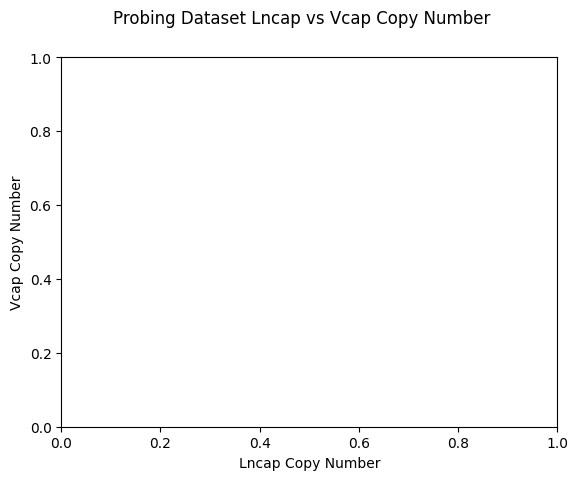

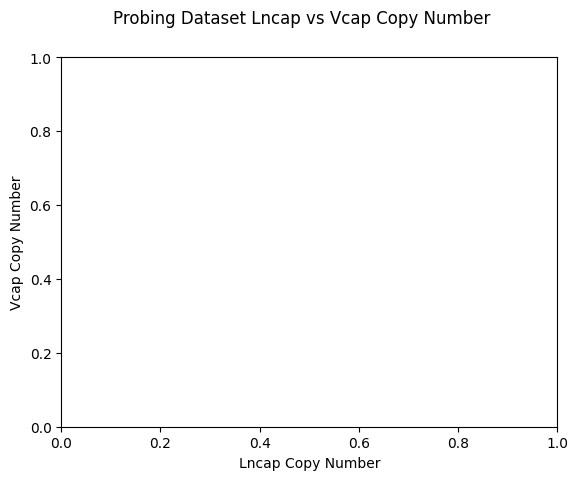

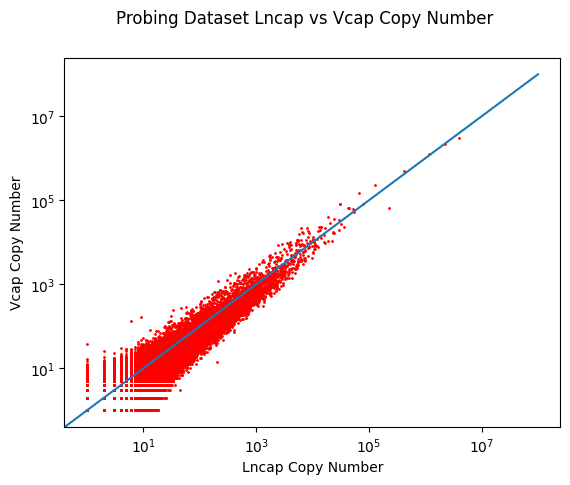

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

plt.suptitle("Probing Dataset Lncap vs Vcap Copy Number")
ax.set_xlabel("Lncap Copy Number")
ax.set_ylabel("Vcap Copy Number")
ax.scatter(full_merged["max_l"], full_merged["max_v"], c="r", s=1.0)
data = list(zip(*[(x, x) for x in range(0, 100000000, 1000)]))
ax.plot(data[0], data[1])
ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

In [13]:
from rbm_torch.utils.seq_utils import seq_to_cat
from sklearn.metrics import pairwise_distances
def get_distance_matrix(dataframe1, dataframe2, molecule="protein"):
    """get distance matrix (in number of mutations) of two provided dataframes"""
    seq_len = len(dataframe1.sequence[0])

    # categorical vector for database sequences
    database_seqs1 = dataframe1["sequence"].tolist()
    database_seqs2 = dataframe2["sequence"].tolist()

    database_cat1 = seq_to_cat(database_seqs1, molecule=molecule)
    database_cat2 = seq_to_cat(database_seqs2, molecule=molecule)

    dist_matrix = pairwise_distances(database_cat1, database_cat2, metric="hamming") * seq_len

    return dist_matrix

In [22]:
enrichv.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l
5,85741.0,GTTTCAGGGGTTTGGTGTTAATTATGATGTGTGTGTGA,126055.0,200728.0,228201.0,126055.0,228201.0,1.810329
7,56177.0,TTCTCCGTGTGTGTGTTTATGTATGGTATGTGTGGTGA,66249.0,125061.0,152108.0,66249.0,152108.0,2.296004
10,40400.0,TATTTAGGGGTTGTGGGTCTAATTTTTGTTTGTTCGA,44729.0,57289.0,67223.0,44729.0,67223.0,1.502895
11,33032.0,GTGGTATTGGTACTTGGTATGAATTGGGGGTTTTGA,42201.0,55624.0,67058.0,42201.0,67058.0,1.589014
15,27387.0,TGTTTTGGGGCTCACGGGGTTTTGTTCTGAATCTGA,31024.0,72078.0,81458.0,31024.0,81458.0,2.625645


In [26]:
from rbm_torch.utils.utils import fasta_read
import pandas as pd
vseqs, vfold, vchars, vq = fasta_read("./exo/pevp.fasta", "dna", threads=6)
lseqs, lfold, lchars, lq = fasta_read("./exo/pelp.fasta", "dna", threads=6)

ve_pd = pd.DataFrame({"sequence": vseqs, "vfold": vfold})
le_pd = pd.DataFrame({"sequence": lseqs, "lfold": lfold})


Process Time 0.003461122512817383
Process Time 0.024281740188598633


In [28]:
dist_mat = get_distance_matrix(ve_pd, le_pd)

In [42]:
hamming_threshold = 4
closest_seqs = []
closest_parent_seqs = []
for i in range(len(ve_pd.sequence)):
    close_seqs = dist_mat[i] <= hamming_threshold
    seq_inds = np.where(close_seqs)[0]
    seq_inds = seq_inds.tolist()
    closest_seqs += seq_inds
    if seq_inds != []:
        closest_parent_seqs += [i]
print(len(list(set(closest_seqs))))

157


In [43]:
ve_pd.iloc[closest_parent_seqs]

,sequence,vfold
33,ATTAATGGGTGGGGGGTTTAGCTTTATGTGGGTTGTGA,10.0
35,GTTTCAGGGGTATGGTGTTAATTATGATGTGTGTGTGA,10.0
47,GCCGATCTCTTGGTGGGGTGGGTTTTGTGTCTGTC---,8.0
63,ATTCCTTTTTTATGTGCGCTTGGTTTTTGTGTTTGGA-,7.0
79,GTGTGGGTATCCTGGTTATGTGGTACTGGGCTAACGA-,7.0
...,...,...
2336,TTCCTATTGGATGGAATTGAGGGTTGTTTTTTGCG---,1.5
2350,AGTTCTTGGGGGGTTGTTGCCTTGTCTATTA-------,1.5
2355,AACTTTTTTGATCCCCTGCCGATTACCGTGATTGAA--,1.5
2376,ATCTGGGCCCGCCTGTGCATACCTCATTTTGTCCGGA-,1.5


In [46]:
from copy import copy
le_close = copy(le_pd.iloc[closest_seqs])
le_close.sort_values("lfold", inplace=True, ascending=False)
le_close.head()

,sequence,lfold
20,TTTCCTTTTTAATGTGCGCTTGGTTTTTGTGTTTGGA-,14.666667
64,TCCTGGTTTCTGGTGTTTTCATTTAGCTTGTTACCTG-,12.000000
104,ATGCCATACACCCTCACTAGCTTCCCATTGATTCA---,11.000000
204,TGAAGTACCTTCTGGTTCTGAGTTTTTCGCCTTTATGA,10.000000
315,ATTTGTCCGCTTGTTATTTGTTGCCCGTGCCCCTTTGA,9.000000


In [49]:
full_merged.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l
0,3514942.0,TCCTGGTTTCTGGTGGTTTCATTTAGCTTGTTACCTGA,3959849.0,2563471.0,3063787.0,3959849.0,3063787.0,0.773713
1,1954859.0,ACATGCACTGAGCCCGACACACCCGCCTGAACTAT,2262995.0,1769898.0,2180058.0,2262995.0,2180058.0,0.963351
2,1064687.0,AGTTCTTGGGGGTTTTGGTTGTTGCCTTGTCTATTA,1162223.0,967257.0,1259816.0,1162223.0,1259816.0,1.083971
3,390684.0,GGTTTTATCGTTTCTTTAGTTGGGTTCTTGGGTGA,427369.0,419939.0,497516.0,427369.0,497516.0,1.164137
4,228431.0,TTGCCGCCCTTTATGGTTTGTTTTTTGCGATGTGGGA,231932.0,53760.0,65811.0,231932.0,65811.0,0.283751


In [51]:
full_merged.sort_values("fold_v_over_l", ascending=False, inplace=True)
full_merged.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l
89334,NaN,TCAAATATAGGGGTTGGGGTATGGGGGTGATCGGGA,1.0,38.0,1.0,1.0,38.0,38.000000
81744,NaN,TGGGGGGGGTATCTACTTGGCTTGGTGGGGGGTTG,6.0,131.0,26.0,6.0,131.0,21.833333
81576,NaN,GTTTCTGGGGGGGGGTATTATGGTAAATATATGGGGA,9.0,163.0,163.0,9.0,163.0,18.111111
78869,1.0,ATGGGGGAGAGTGAGGGGTGATTGTTAGGAGGTAT,NaN,17.0,10.0,1.0,17.0,17.000000
72352,1.0,TTTGGCCCGTGCGTAATTATTATACTGGGTGTTTTTGA,NaN,15.0,NaN,1.0,15.0,15.000000


In [12]:
from rbm_torch.utils import data_prep as dp

foldv = full_merged["fold_v_over_l"].tolist()

v_enriched = [x for x in foldv if x >= 2]
l_enriched = [x for x in foldv if x <= 0.5]

print("v_enriched", len(v_enriched), "l_enriched", len(l_enriched))

v_enriched 9633 l_enriched 35372


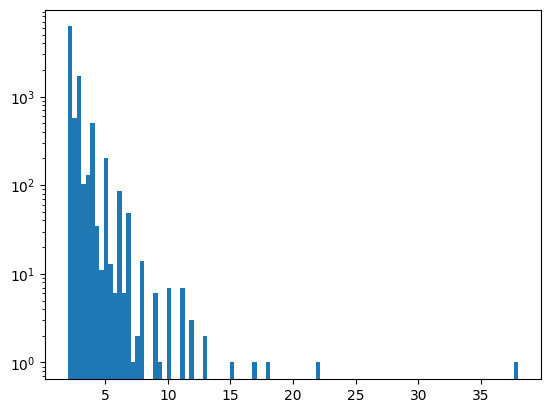

In [56]:
dp.quick_hist(v_enriched)

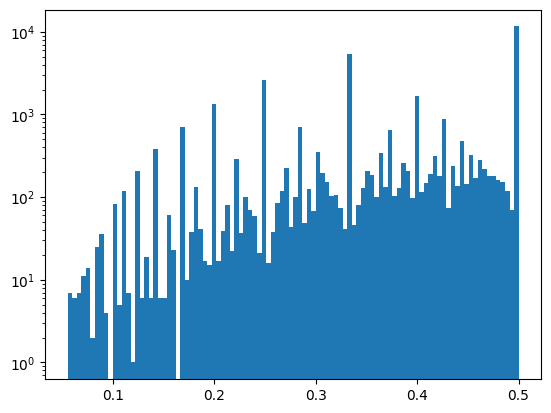

In [57]:
dp.quick_hist(l_enriched)

In [17]:
vleft = vfull.merge(lfull, on=['sequence'], how='left', indicator=True)
lleft = lfull.merge(vfull, on=['sequence'], how='left', indicator=True)

v_only = vleft[vleft["_merge"] == "left_only"]
l_only = lleft[lleft["_merge"] == "left_only"]

In [67]:
v_only.index.__len__()

65785

In [68]:
l_only.index.__len__()

106739

In [69]:
v_only

,copy_num_v1,sequence,copy_num_v2,copy_num_l1,copy_num_l2,_merge
6628,33.0,TGCGCCGAATAAACGGTTTACTTAGCTCTTAGGGGA,NaN,NaN,NaN,left_only
7419,29.0,TGCTAACCTGGTTTTTTTTGGTATGTTTGATGCGC,NaN,NaN,NaN,left_only
8262,25.0,ACATCCTAGCACATGATGAGACTACAACGCGCCTTA,NaN,NaN,NaN,left_only
9083,22.0,TCTTAATAAAACTACATATTCGCCGGTCCAAATCC,NaN,NaN,NaN,left_only
10466,18.0,TCAATTCCCGTTCTCAACTCGCTGTTTATGTGTCG,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...
163536,NaN,GACTCACTGGGGTTTCGTTTTTTGTATCTTTTTTT,1.0,NaN,NaN,left_only
163537,NaN,AACTGACTGGGGTTTCGTTTTTTGTATCTTTTTTT,1.0,NaN,NaN,left_only
163538,NaN,GGTTGTGGGGCGTACGCTTAGTATGGAGTTTTTTT,1.0,NaN,NaN,left_only
163539,NaN,GGTTTTGGGCCGTACGCTTATTATGGAGTTTTTTT,1.0,NaN,NaN,left_only


In [18]:
from copy import copy
vo = copy(v_only)
lo = copy(l_only)


vo.reset_index(drop=True, inplace=True)
lo.reset_index(drop=True, inplace=True)
vo["max_v"] = vo.apply(lambda x: max(x["copy_num_v1"], x["copy_num_v2"]), axis=1)
vo["fold_v_over_l"] = vo["max_v"]
lo["max_l"] = lo.apply(lambda x: max(x["copy_num_l1"], x["copy_num_l2"]), axis=1)
lo["fold_v_over_l"] = lo.apply(lambda x: 1./x["max_l"], axis=1)

In [89]:
vo.head()

,copy_num_v1,sequence,copy_num_v2,copy_num_l1,copy_num_l2,_merge,v_max,max_v
0,33.0,TGCGCCGAATAAACGGTTTACTTAGCTCTTAGGGGA,NaN,NaN,NaN,left_only,33.0,33.0
1,29.0,TGCTAACCTGGTTTTTTTTGGTATGTTTGATGCGC,NaN,NaN,NaN,left_only,29.0,29.0
2,25.0,ACATCCTAGCACATGATGAGACTACAACGCGCCTTA,NaN,NaN,NaN,left_only,25.0,25.0
3,22.0,TCTTAATAAAACTACATATTCGCCGGTCCAAATCC,NaN,NaN,NaN,left_only,22.0,22.0
4,18.0,TCAATTCCCGTTCTCAACTCGCTGTTTATGTGTCG,NaN,NaN,NaN,left_only,18.0,18.0


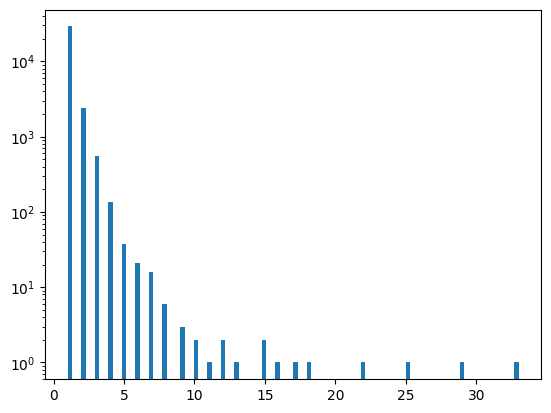

In [75]:
dp.quick_hist(vo["v_max"].tolist())

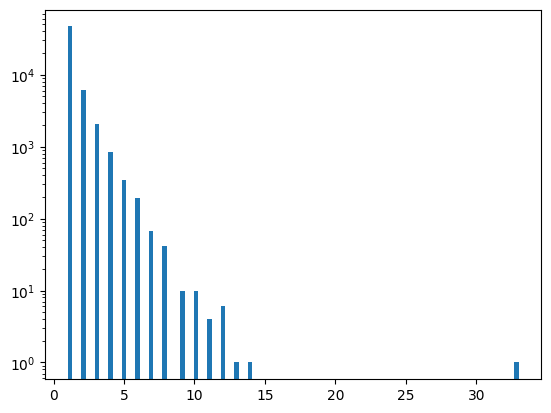

In [76]:
dp.quick_hist(lo["l_max"].tolist())

In [19]:
enrichv = full_merged[(full_merged["max_v"] >= 5) & (full_merged["fold_v_over_l"] >= 1.5)]  # all sequences that enrich v over l at 2x or greater with a copy_num of at least 5 in the v data files and
full_enrichv = pd.concat([enrichv, vo[vo["fold_v_over_l"] >= 5]], join="outer")  # add sequences that
print(enrichv.index.__len__(), full_enrichv.index.__len__())

4157 4256


In [91]:
full_enrichv.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l,_merge,v_max
89334,NaN,TCAAATATAGGGGTTGGGGTATGGGGGTGATCGGGA,1.0,38.0,1.0,1.0,38.0,38.000000,NaN,NaN
81744,NaN,TGGGGGGGGTATCTACTTGGCTTGGTGGGGGGTTG,6.0,131.0,26.0,6.0,131.0,21.833333,NaN,NaN
81576,NaN,GTTTCTGGGGGGGGGTATTATGGTAAATATATGGGGA,9.0,163.0,163.0,9.0,163.0,18.111111,NaN,NaN
78869,1.0,ATGGGGGAGAGTGAGGGGTGATTGTTAGGAGGTAT,NaN,17.0,10.0,1.0,17.0,17.000000,NaN,NaN
72352,1.0,TTTGGCCCGTGCGTAATTATTATACTGGGTGTTTTTGA,NaN,15.0,NaN,1.0,15.0,15.000000,NaN,NaN


In [110]:
ng_seqs = full_enrichv["sequence"].tolist()
gapped_seqs = dp.gap_adder(ng_seqs, 38, position_indx=-1)
full_enrichv["sequence"] = gapped_seqs

In [111]:
dp.dataframe_to_fasta(full_enrichv, "./exo/pev.fasta", count_key="fold_v_over_l")

In [107]:
full_enrichv["fold_v_over_l"].isnull().values.any()

False

In [96]:
full_enrichv.iloc[0, 0]

nan

In [20]:
enrichl= full_merged[(full_merged["max_l"] >= 5) & (full_merged["fold_v_over_l"] <= 0.5)]  # all sequences that enrich v over l at 2x or greater with a copy_num of at least 5 in the v data files and
full_enrichl = pd.concat([enrichl, lo[lo["fold_v_over_l"] <= 0.2]], join="outer")  # add sequences unobserved in vcap data with copy num of 5 or greater
print(enrichl.index.__len__(), full_enrichl.index.__len__())

20018 20692


In [113]:
full_enrichl["fold_v_over_l"].isnull().values.any()

False

In [116]:
ng_seqs = full_enrichl["sequence"].tolist()
gapped_seqs = dp.gap_adder(ng_seqs, 38, position_indx=-1)
full_enrichl["sequence"] = gapped_seqs

full_enrichl["fold_l_over_v"] = full_enrichl.apply(lambda x: 1./x["fold_v_over_l"], axis=1)

dp.dataframe_to_fasta(full_enrichl, "./exo/pel.fasta", count_key="fold_l_over_v")

In [129]:
### Forgot to remove very alike sequences
### Lets try to do that now
from sklearn.metrics import pairwise_distances
from rbm_torch.utils.seq_utils import seq_to_cat


def prune_sim_seqs(dataframe, hamming_threshold=0, molecule="protein"):
    dataframe.reset_index(drop=True, inplace=True)
    seqs = dataframe["sequence"].tolist()
    index = dataframe.index.tolist()

    cat = seq_to_cat(seqs, molecule=molecule)
    X = cat.numpy().astype(np.int8)

    seq_len = len(seqs[0])
    selected_seqs, selected_indices, selected_cat = [], [], []
    total_seqs = len(seqs)
    for i in range(total_seqs):  # len(m1_seqs)
        if i == 0:
            selected_seqs.append(seqs[i])
            selected_indices.append(index[i])
            selected_cat.append(X[i])
        else:
            # number of mutations this sequence is from all sequences in the selected subset
            dist_matrix = pairwise_distances([X[i]], selected_cat, metric="hamming") * seq_len
            if min(dist_matrix[0]) > hamming_threshold:
                selected_seqs.append(seqs[i])
                selected_indices.append(index[i])
                selected_cat.append(X[i])

    print(f"Kept {len(selected_seqs)} of {total_seqs}")

    dataframe = dataframe.iloc[selected_indices, :]
    # dataframe.head()
    dataframe.reset_index(drop=True, inplace=True)
    return dataframe

In [132]:
full_enrichv.sort_values("fold_v_over_l", inplace=True, ascending=False)
enrichv_pruned = prune_sim_seqs(full_enrichv, hamming_threshold=4, molecule="dna")  # remove sequences within 4 mutations of any others
dp.dataframe_to_fasta(enrichv_pruned, "./exo/pevp.fasta", count_key="fold_v_over_l")

Kept 2451 of 4256


In [131]:
enrichv_pruned.head()

,copy_num_l1,sequence,copy_num_l2,copy_num_v1,copy_num_v2,max_l,max_v,fold_v_over_l,_merge,v_max
0,NaN,TCAAATATAGGGGTTGGGGTATGGGGGTGATCGGGA--,1.0,38.0,1.0,1.0,38.0,38.000000,NaN,NaN
1,NaN,TGGGGGGGGTATCTACTTGGCTTGGTGGGGGGTTG---,6.0,131.0,26.0,6.0,131.0,21.833333,NaN,NaN
2,NaN,GTTTCTGGGGGGGGGTATTATGGTAAATATATGGGGA-,9.0,163.0,163.0,9.0,163.0,18.111111,NaN,NaN
3,1.0,ATGGGGGAGAGTGAGGGGTGATTGTTAGGAGGTAT---,NaN,17.0,10.0,1.0,17.0,17.000000,NaN,NaN
4,1.0,TTTGGCCCGTGCGTAATTATTATACTGGGTGTTTTTGA,NaN,15.0,NaN,1.0,15.0,15.000000,NaN,NaN


In [133]:
full_enrichl.sort_values("fold_l_over_v", inplace=True, ascending=False)
enrichl_pruned = prune_sim_seqs(full_enrichl, hamming_threshold=4, molecule="dna")  # remove sequences within 4 mutations of any others
dp.dataframe_to_fasta(enrichl_pruned, "./exo/pelp.fasta", count_key="fold_l_over_v")

Kept 19172 of 20692


Process Time 0.009849071502685547


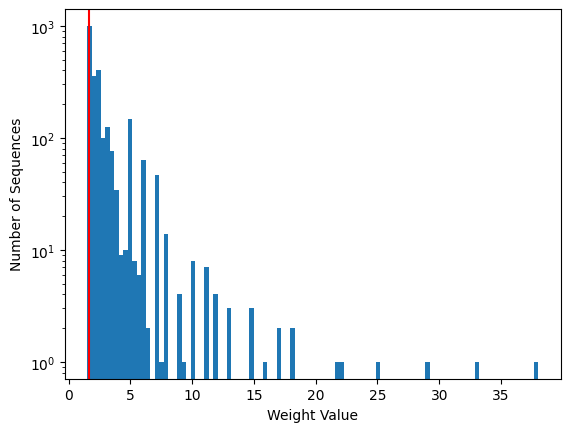

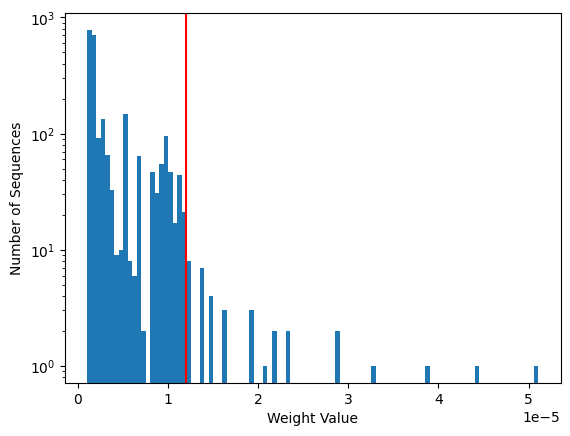

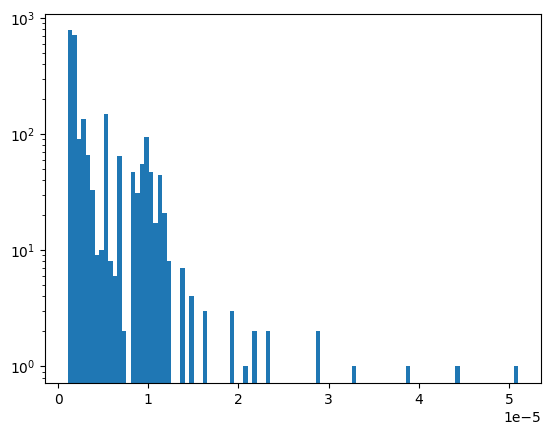

In [137]:
from rbm_torch.utils.utils import fasta_read

files = ["pev.fasta", "pel.fasta", "pevp.fasta", "pelp.fasta"]
seqs, copy_num, chars, q = fasta_read(f"./exo/{files[2]}", "dna")
stan_cns = dp.standardize_affinities(copy_num, out_plots="./exo/pevp", scale="linear", dividers=[20], target_scaling=[2])
dp.quick_hist(stan_cns)

In [144]:
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

def standardize_affinities(affs, out_plots=None, scale="log", dividers=[5, 10, 25], target_scaling=[5, 10, 100], divider_type="percentile", negate_index=None, splitter=None):
    """ Generates new affinites as: new aff = 1/(#of_sequences_at_aff)*math.log(aff+0.001)

    Parameters
    ----------
    affs: list,
        list of affinities/copy numbers to "standardize"
    out_plot: str, optional, default=None
        file where plot of new affinites should be saved, don't include file extension
    dividers: list, optional, default=[5, 10, 25]


    Returns
    -------
    standardized_affinities: list
        new affinities after being "standardized"

    Notes
    -----
    Goal of this function is to remove huge impact of large number of nonspecific/non-binding sequences with copy number of 1.
    """
    # First let's calculate how many sequences of each affinity there are
    # aff_num = Counter(affs)
    # aff_totals = [aff_num[x] for x in uniq_aff]

    # ex . 1, 2, 3, 4, 5
    uniq_aff = list(set(affs))
    np_uniq_aff = np.asarray(uniq_aff)

    # ex. divider [50]
    if divider_type == "percentile":
        percentiles = copy(dividers)
        # boundaries = [np.percentile(np_uniq_aff, p) for p in dividers]
    elif divider_type == "copy_num":
        percentiles = [np.mean(np_uniq_aff <= q) * 100 for q in dividers]

    # boundaries = [3]
    boundaries = [np.percentile(np_uniq_aff, p) for p in percentiles]  # convert percentile values to
    # boundaries = [np.mean(np_uniq_aff <= q)*1000 for q in dividers]  # convert copynum values to quantiles

    boundaries.insert(0, 0)
    boundaries.append(max(uniq_aff) + 1)
    # boundaries = [0, 3, 6]

    totals = []
    for j in range(len(dividers) + 1):
        totals.append(len([i for i in affs if boundaries[j] < i <= boundaries[j + 1]]))
    # totals = [3, 2]

    if out_plots is not None:
        fig, axs = plt.subplots(1, 1)
        axs.hist(affs, bins=100)
        axs.set_yscale('log')
        axs.set_xlabel("Weight Value")
        axs.set_ylabel("Number of Sequences")
        for i in boundaries[1:-1]:
            plt.axvline(i, c="r")
        plt.savefig(out_plots + "_pre_transformation.png", dpi=400)

    def assign_denominator(x):
        for j in range(len(dividers) + 1):
            if boundaries[j] < x <= boundaries[j + 1]:
                return totals[j]

    # With our affinity totals we can now "standardize" the sequence impact by making the sum of weights of each affinity equal to 1
    if scale == "linear":
        lin_affs = scale_values_np(np.asarray(uniq_aff), min=1e-2, max=1.)
        la = lin_affs.squeeze(1).tolist()
        standardization_dict = {x: 1. / assign_denominator(x) * la[xid] for xid, x in enumerate(uniq_aff)}
    elif scale == "log":
        standardization_dict = {x: 1. / assign_denominator(x) * math.log(x + 0.001) for xid, x in enumerate(uniq_aff)}  # format: old_aff is key and new
    elif scale == "None":
        standardization_dict = {x: 1. / assign_denominator(x) * x for xid, x in enumerate(uniq_aff)}
    else:
        print(f"scale option {scale} not supported")
        exit(1)

    stand_affs = list(map(standardization_dict.get, affs))  # Replace each value in affs with the dictionary replacement defined in standardization dict

    # avoid going too low
    single_precision_eps = np.finfo("float32").eps
    if min(stand_affs) < single_precision_eps:
        fix_min = single_precision_eps / min(stand_affs)
        stand_affs = [x * fix_min for x in stand_affs]
        standardization_dict = {k: v * fix_min for k, v in standardization_dict.items()}

    # Calculate Rough Sums, so we have a general idea of the total weight of each section
    uniq_stand_affs = list(set(stand_affs))

    new_boundaries = [np.percentile(np.asarray(uniq_stand_affs), p) for p in percentiles]
    new_boundaries.append(max(uniq_stand_affs) + 1)

    percentile_sums = []
    for nib, nb in enumerate(new_boundaries):
        if nib != 0:
            percentile_sums.append(sum([x for x in stand_affs if new_boundaries[nib - 1] < x <= nb]))
        else:
            percentile_sums.append(sum([x for x in stand_affs if x <= nb]))

    multi_factors = []
    for i in range(1, len(dividers) + 1):
        sum_ratio = percentile_sums[i] / percentile_sums[i - 1]
        multi_factors.append(target_scaling[i - 1] / sum_ratio)
        percentile_sums[i] *= multi_factors[-1]
        if multi_factors[-1] < 1.:
            print("Warning, values in a higher bracket will be lowered past the boundary. Recommend raising target scaling or changing boundaries")
            print("Totals in each bracket:", totals)
            print("Bracket multipliers:", multi_factors)
            exit(1)

    def assign_factor(x):
        for j in range(1, len(new_boundaries)):
            if new_boundaries[j - 1] < x <= new_boundaries[j]:
                return multi_factors[j - 1]
        return 1.

    stand_affs = [x * assign_factor(x) for x in stand_affs]
    standardization_dict = {k: v * assign_factor(v) for k, v in standardization_dict.items()}

    new_boundaries = [x * np.prod(multi_factors[xid]) for xid, x in enumerate(new_boundaries[:-1])]
    new_boundaries.append(max(stand_affs) + 1)
    new_boundaries.insert(0, 0.)

    new_percentile_sums = []
    for nib in range(len(new_boundaries) - 1):
        new_percentile_sums.append(sum([x for x in stand_affs if new_boundaries[nib] < x <= new_boundaries[nib + 1]]))

    if negate_index is not None:
        stand_affs = [x if x > new_boundaries[negate_index + 1] else -x for x in stand_affs]

    if splitter is not None:
        stand_affs = [x - splitter[0] if x < 0 else x + splitter[1] for x in stand_affs]

    if out_plots is not None:
        with open(out_plots + "_affinity_mapping.txt", "w") as o:
            print(f"Standardization run with options: scale={scale}, dividers={dividers}, divider_type={divider_type}, target_scaling={target_scaling}", file=o)
            print("Sums of all weights within a given range", file=o)
            for i in range(len(new_percentile_sums)):
                if i == 0:
                    print(f"range {0} to {new_boundaries[i + 1]}: sum = {new_percentile_sums[i]}", file=o)
                else:
                    print(f"range {new_boundaries[i]} to {new_boundaries[i + 1]}: sum = {new_percentile_sums[i]}", file=o)
            print("Affinity original value to new value mapping", file=o)
            for key in sorted(standardization_dict):
                print(f"{key} : {standardization_dict[key]}", file=o)

    if out_plots is not None:
        fig, axs = plt.subplots(1, 1)
        axs.hist(stand_affs, bins=100)
        axs.set_yscale('log')
        axs.set_xlabel("Weight Value")
        axs.set_ylabel("Number of Sequences")
        for i in new_boundaries[1:-1]:
            plt.axvline(i, c="r")
        plt.savefig(out_plots + "_post_transformation.png", dpi=400)

    return stand_affs


def scale_values_np(vals, min=0.05, max=0.95):
    """ Scale provided 1D np array values to b/t min and max

    Parameters
    ----------
    vals: np array
        1D np array of floats
    min: float, optional, default=0.05
        lowest value of vals will be scaled to this value
    max: flaot, optional, default=0.95
        largest value of vals will be scaled to this vales

    Returns
    -------
    data: np array
        np array of scaled values
    """
    nscaler = MinMaxScaler(feature_range=(min, max))
    return nscaler.fit_transform(vals.reshape(-1, 1))

In [146]:
stan_cns = standardize_affinities(copy_num, out_plots="./exo/pevp", scale="None", dividers=[30, 65, 87], target_scaling=[2, 2, 2])

dp.make_weight_file("./exo/pevp_st", stan_cns, "st")

In [147]:

files = ["pev.fasta", "pel.fasta", "pevp.fasta", "pelp.fasta"]
seqs, copy_num, chars, q = fasta_read(f"./exo/{files[3]}", "dna")

stan_cns = standardize_affinities(copy_num, out_plots="./exo/pelp", scale="None", dividers=[30, 65, 87], target_scaling=[2, 2, 2])

dp.make_weight_file("./exo/pelp_st", stan_cns, "st")

Process Time 0.08148336410522461
